**Name : Dhruvi Shah**

**ID : 202211032**

In [11]:
import numpy as np
import math
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context(font_scale=5)
import warnings
warnings.filterwarnings('ignore')

In [12]:
P = 0.5
N_FLIPS = 10
N_COINS = 1000
N_TRIALS = 100000

**Q). Run a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: 
c1 is the first coin flipped; c_rand is a coin you choose at random, and 
c_min is the coin that had the minimum frequency of heads (pick the earlier one in the case of a tie). Let v1,vrand and vmin be the fraction of heads you optain for the respective three coins.**

**(a) What is µ for the three coins selected?** 

As per our assumption, we are tossing a fair coin so the probabiltiy of the occurence of heads and tails will be the same (as for the fair coin both the events are equiprobable.So the probabiltiy of heads and tails will be : P(heads)=P(tails)=0.5 . Hence µ for each of c1,c_min and c_rands as well as for all other coins regardless of what the outcomes are for the flips of those coins µ will be same.

**(b) Repeat this experiment a large number of times (e.g. 100,000 runs of the entire experiment) to get several instances of v1, vrand and vmin
and plot the histograms of the distributions for v1, vrand and vmin. Notice that which coins end up being crand and cmin may differ from one run to another.**

In [13]:
def experiment(p, n_flips, n_coins, n_trials):
    outcome= np.random.binomial(n_flips, p, (n_trials, n_coins))
    v1 = outcome[:, 0]  #for the first coins flipped
    v_min = outcome.min(axis=1) #for the coin with minimum frequency of heads
    v_rands = np.apply_along_axis(np.random.choice, 1, outcome) #for randomly chosen coin
    
    return (v1, v_min, v_rands)

In [14]:
v1, v_min, v_rands = experiment(P, N_FLIPS, N_COINS, N_TRIALS)

In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_dist(x, bins=10): 
    sns.distplot(
        x,
        hist=True,
        bins=bins, 
        hist_kws={"align": "left"},
        kde_kws={"bw": 1,"shade": True},
    );
     

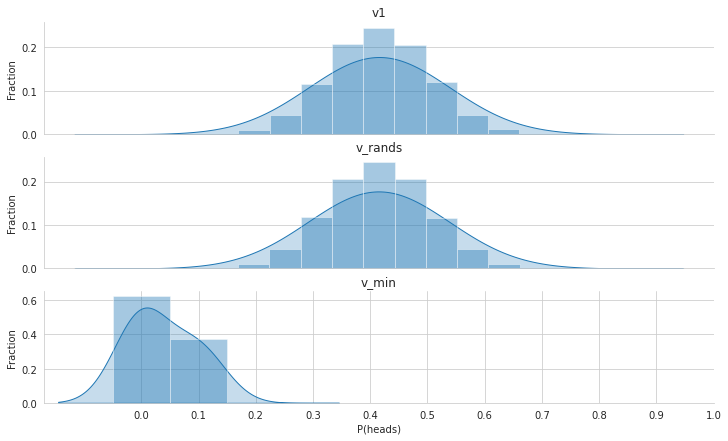

In [17]:
plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
plot_dist(v1)
plt.ylabel("Fraction")
plt.title("v1")
plt.xticks([])

plt.subplot(3,1,2)
plot_dist(v_rands);
plt.ylabel("Fraction")
plt.title("v_rands")
plt.xticks([])

plt.subplot(3,1,3)
plot_dist(v_min, bins=2);
plt.xlabel("P(heads)");
plt.ylabel("Fraction");
plt.title("v_min");
sns.despine()

plt.xticks(np.arange(11), np.arange(11)/10);

As seen from the graph, plots of vmin and vrand are centered around the true mean but vmin is not . Morover, the graphs of v1 and vrandoms looks quiet similar as there is nothing special about the first coin as well for the randomly chosen coins. It happens so because c1 and crandom which produces v1 and vrandom are randomly chosen independent of the data which even could be fixed before the experiment of flipping. Whereas, the value of cmin is the coin that had minimum head frequency which generates vmin and that could only be chosen after conducting experiment. 

**(c) Using (b), plot estimates for P(|v-µ|>ε)
 as a function of ε, together with the Hoeffding bound, 2e$^{-2 \epsilon ^2N}$**



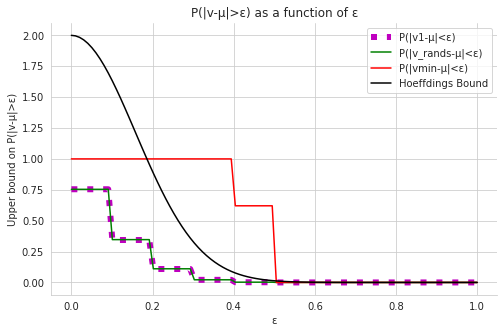

In [10]:
def ineq_hoeffding(epsilon, N=N_FLIPS): 
    return 2 * np.exp(-2 * (epsilon**2) * N)

def error_big(v, mu, epsilon):
    return (np.abs(v - mu)/N_FLIPS > epsilon).mean()

epsilons = np.linspace(0,10,100)/N_FLIPS

c1_errs = [error_big(v1, 5, e) for e in epsilons]
c_rand_errs = [error_big(v_rands, 5, e) for e in epsilons]
c_min_errs = [error_big(v_min, 5, e) for e in epsilons]

plt.figure(figsize=(8,5));
plt.plot(epsilons, c1_errs, linewidth=6, linestyle= "dotted",color='m');
plt.plot(epsilons, c_rand_errs,color='g');
plt.plot(epsilons, c_min_errs,linestyle='-',color='r');
plt.plot(epsilons, np.apply_along_axis(ineq_hoeffding, 0, epsilons),color='k');
plt.legend(["P(|v1-µ|<ε)","P(|v_rands-µ|<ε)","P(|vmin-µ|<ε)","Hoeffdings Bound"])
sns.despine()
plt.xlabel("ε")
plt.ylabel("Upper bound on P(|v-µ|>ε)")
plt.title("P(|v-µ|>ε) as a function of ε");

**(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.**

Ans - As seen from the plot,  v1 and v_rand follows the  hoeffdings inequality , but vmin does not follow. It happened so beacause we have chosen vmin randomly from sample set of 100000 which is similar to the situation where h is not chosen beforehand but rather chosen from observed set of the hypothesis.